# Context of Data
Company - UK-based and registered non-store online retail

Products for selling - Mainly all-occasion gifts

Customers - Most are wholesalers (local or international)

Transactions Period - **<span class="mark">1st Dec 2010 - 9th Dec 2011</span>** (One year)


# Results obtained from Exploratory Data Analysis (EDA)

1. The **customer with the highest number of orders comes from the United Kingdom (UK)** 
2. The **customer with the highest money spent on purchases comes from Netherlands** 
3. The company receives the highest number of orders from customers in the UK (since it is a UK-based company). Therefore, the TOP 5 countries (including UK) that place the highest number of orders are as below: 
    - United Kingdom 
	- Germany 
	- France
	- Ireland (EIRE)
	- Spain
4. As the company receives the highest number of orders from customers in the UK (since it is a UK-based company), customers in the UK spend the most on their purchases. Therefore, the TOP 5 countries (including UK) that spend the most money on purchases are as below: 
    - United Kingdom 
	- Netherlands
	- Ireland (EIRE)
	- Germany
	- France
5. **November 2011 has the highest sales** 
	- The month with the lowest sales is undetermined as the dataset consists of transactions until 9th December 2011 in December 
6. There are **no transactions on Saturday** between 1st Dec 2010 - 9th Dec 2011 
7. The number of orders received by the company tends to increases from Monday to Thursday and decrese afterward
8. The company receives the **highest number of orders at 12:00pm** 
	- Possibly most customers made purchases during **lunch hour between 12:00pm - 2:00pm**
9. The company tends to **give out FREE items for purchases occasionally each month** 
	- However, it is not clear what factors contribute to giving out the FREE items to the particular customers 

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import missingno as msno # missing data visualization module for Python
#import pandas_profiling

import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [2]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [3]:
# specify encoding to deal with different formats
df = pd.read_csv('E_Commerce.csv', encoding = 'ISO-8859-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# change the column names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [6]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# <span class="mark">Data Cleaning</span> 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


## Check missing values for each column 

In [8]:
# check missing values for each column 
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

In [9]:
# check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [10]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()

In [11]:
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Remove rows with missing values 

In [12]:
# df_new without missing values
df_new = df.dropna()

In [13]:
# check missing values for each column 
df_new.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   406829 non-null  object 
 1   stock_code    406829 non-null  object 
 2   description   406829 non-null  object 
 3   quantity      406829 non-null  int64  
 4   invoice_date  406829 non-null  object 
 5   unit_price    406829 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [15]:
# change columns tyoe - String to Int type 
df_new['cust_id'] = df_new['cust_id'].astype('int64')

In [16]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   406829 non-null  object 
 1   stock_code    406829 non-null  object 
 2   description   406829 non-null  object 
 3   quantity      406829 non-null  int64  
 4   invoice_date  406829 non-null  object 
 5   unit_price    406829 non-null  float64
 6   cust_id       406829 non-null  int64  
 7   country       406829 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 27.9+ MB


In [18]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


## Remove **Quantity** with negative values

In [19]:
df_new = df_new[df_new.quantity > 0]

In [20]:
df_new.describe().round(2)

,quantity,unit_price,cust_id
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


## Add the column - amount_spent 

In [21]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [22]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

## Add the columns - Month, Day and Hour for the invoice 

In [23]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,12/1/2010 8:26,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,12/1/2010 8:26,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,12/1/2010 8:26,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,12/1/2010 8:26,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,12/1/2010 8:26,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


# <span class="mark">Exploratory Data Analysis (EDA)</span> 

## How many orders made by the customers? 

In [24]:
df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count().head()

,cust_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


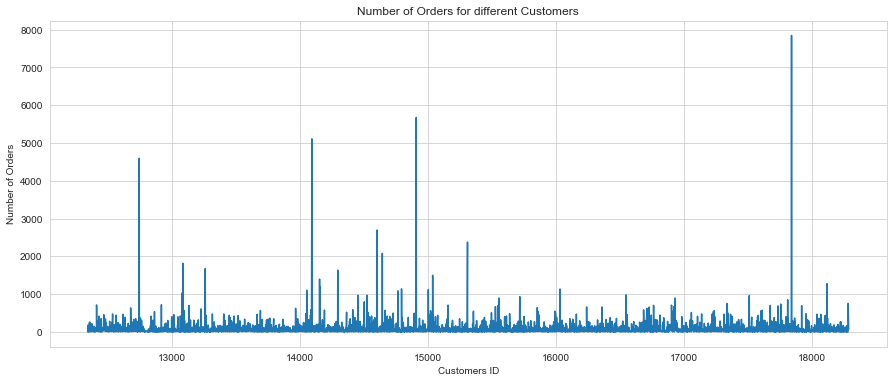

In [25]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

### Check TOP 5 most number of orders 

In [26]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700


## How much money spent by the customers?

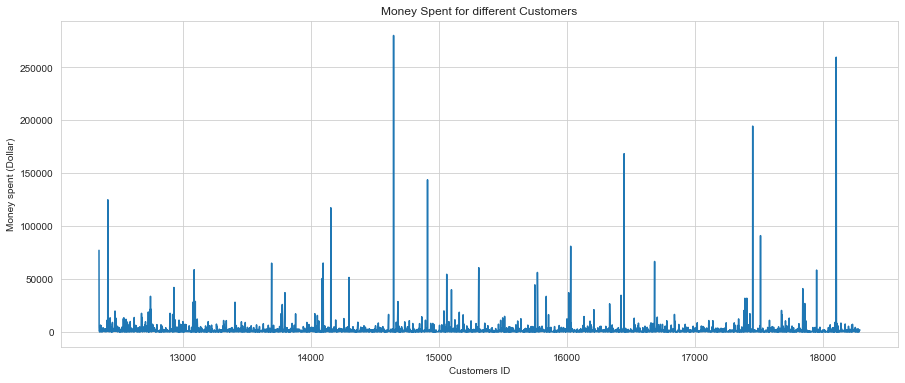

In [27]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

### Check TOP 5 highest money spent 

In [28]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


# Discover patterns for **<span class="girk">Number of Orders</span>** 
Credit: https://www.kaggle.com/hendraherviawan/customer-purchasing-patterns

## How many orders (per month)?

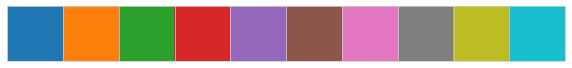

In [29]:
# color available
sns.palplot(color)

In [30]:
df_new.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,12/1/2010 8:26,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,12/1/2010 8:26,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,12/1/2010 8:26,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,12/1/2010 8:26,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,12/1/2010 8:26,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


# Discover patterns for **<span class="girk">Unit Price</span>**

In [31]:
df_new.unit_price.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

**We see that there are unit price = 0 (FREE items)**

<span class="mark">There are some free items given to customers from time to time</span>.

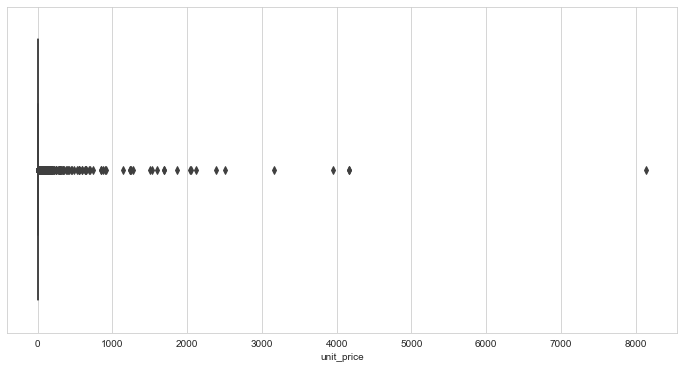

In [32]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df_new.unit_price)
plt.show()

In [33]:
df_free = df_new[df_new.unit_price == 0]

In [34]:
df_free.head()

,invoice_num,invoice_date,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,12/5/2010 14:02,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,12/16/2010 14:36,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,12/21/2010 13:45,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,1/6/2011 16:41,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,1/6/2011 16:41,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


# Boxplot - Range of unit price

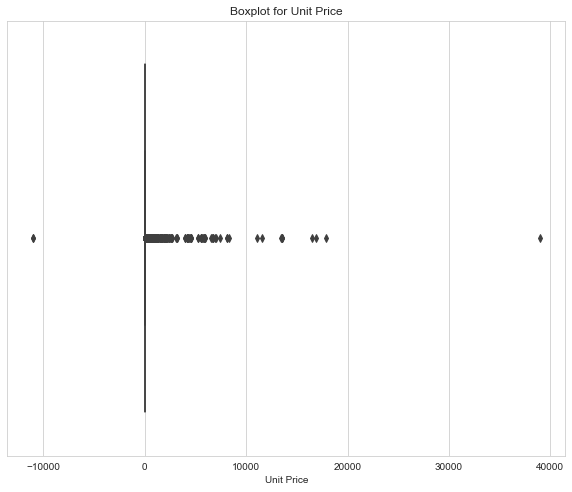

In [35]:
plt.subplots(figsize=(10,8))
sns.boxplot(df.unit_price)

plt.xlabel('Unit Price')
plt.title('Boxplot for Unit Price')
plt.show()

# Distribution plot - Unit price

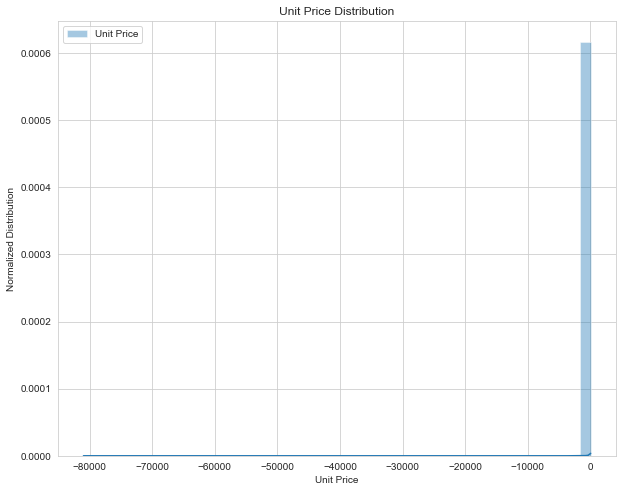

In [36]:
# Unit price distribition plot
plt.subplots(figsize=(10,8))
sns.distplot(df.quantity[df.quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Normalized Distribution')
plt.title('Unit Price Distribution')
plt.show()